In [1]:
from qaoa_utils import *
import time
import matplotlib.pyplot as plt
import networkx as nx
np.set_printoptions(precision=4)

In [2]:
# 3-regular graph with six nodes 
G = nx.random_regular_graph(d=3, n=6, seed=12345)
best_solution, best_cut = best_cut(G)

## For constructing a weighted maxcut, if weighted maxcut, we need to tune the search space of gamma 
# np.random.seed(0)
# for edge in G.edges():
#     nx.set_edge_attributes(G, {edge: {"weight": np.random.randint(0, 500) / 100}}) #500

Best string: [0 1 1 1 0 0] with cut: 9


In [3]:
# Be free to adjust the grid search space
N_grid = 40
gammas = np.linspace(-1*np.pi/4, 1*np.pi/4, N_grid) 
betas = np.linspace(0, np.pi*0.5, N_grid)
extent = [-0.25, 0.25, 0, 0.5]

In [4]:
p = 1 # QAOA depth = 1
fix = False  # extend the depth to 2 by fixing the depth-1 parameters
fix_x = [3.03098639, -1.14395485]

# Noiseless landscape

In [5]:
total_cost_grid = np.zeros((N_grid, N_grid))
min_cost = 1e10
min_gamma = 0.0
min_beta = 0.0
min_config = None
results_nf = {}
func = get_black_box_objective(G, p=p, n_trials=1024, repeat=1, sv=True) 
# statevector simulator for noiseless simulation
t = 0
start_time = time.time()
for k1 in range(len(betas)):
    for k2 in range(len(gammas)):
        beta = betas[k1]
        gamma = gammas[k2]
        if fix == True:
            ini_point = np.array((fix_x[0],fix_x[1],gamma,beta))
        else:
            ini_point = np.array((gamma,beta))
        total_cost = func(ini_point)
        total_cost_grid[k1, k2] = total_cost
        
        if total_cost < min_cost and beta != 0.0 and gamma != 0.0:
            min_cost = total_cost
            min_gamma = gamma
            min_beta = beta
        if t % 100 == 0:   
            end_time = time.time()
            print(f'Finish {t}/{N_grid*N_grid}, elapse {end_time-start_time:.2f}')
        t += 1
results_nf["min_cost"] = min_cost
results_nf["min_gamma"] = min_gamma
results_nf["min_betas"] = min_beta
results_nf["beta_grid"] = betas
results_nf["gamma_grid"] = gammas
results_nf["total_cost_grid"] = total_cost_grid

Finish 0/1600, elapse 0.04
Finish 100/1600, elapse 1.62
Finish 200/1600, elapse 2.93
Finish 300/1600, elapse 4.28
Finish 400/1600, elapse 5.58
Finish 500/1600, elapse 6.88
Finish 600/1600, elapse 8.20
Finish 700/1600, elapse 9.54
Finish 800/1600, elapse 10.85
Finish 900/1600, elapse 12.21
Finish 1000/1600, elapse 13.62
Finish 1100/1600, elapse 14.92
Finish 1200/1600, elapse 16.22
Finish 1300/1600, elapse 17.56
Finish 1400/1600, elapse 18.86
Finish 1500/1600, elapse 20.20


Minimum cost solution: -6.23
Gamma: -0.10*pi
Beta: 0.13*pi


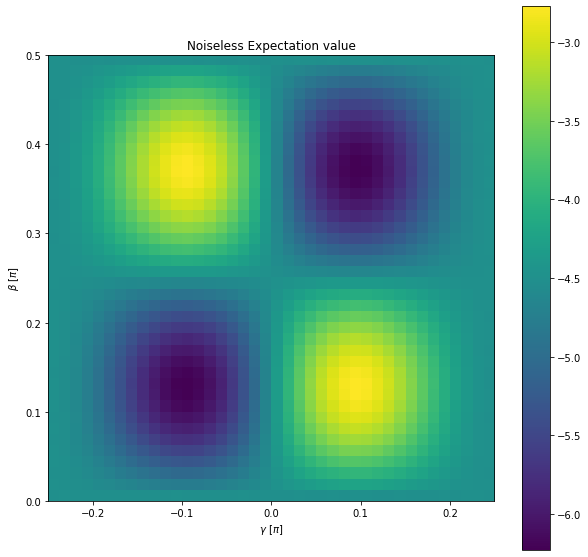

In [6]:
print("=" * 100)
print(f"Minimum cost solution: {results_nf['min_cost']:.2f}")
print(f"Gamma: {results_nf['min_gamma'] / np.pi:.2f}*pi")
print(f"Beta: {results_nf['min_betas']/np.pi:.2f}*pi")
print("=" * 100)
best_x = np.array((results_nf["min_betas"],results_nf["min_gamma"])) 
plt.figure(figsize=(10, 10))
plt.title(f"Noiseless Expectation value")
plt.imshow(results_nf["total_cost_grid"][::-1],extent=extent)
plt.colorbar()
plt.xlabel(r"$\gamma \ [\pi]$")
plt.ylabel(r"$\beta \ [\pi]$")
plt.show()

# Noisy landscape

In [7]:
total_cost_grid = np.zeros((N_grid, N_grid))
min_cost = 1e10
min_gamma = 0.0
min_beta = 0.0
min_config = None
results = {}
##### set the noise level by error_para
noise_level = 0.01
# Since the measurement induce some variance by nature,
# repeat or enlarge the n_trail to mitigate the measurement noise 
func = get_black_box_objective_customized(G, p=p, error_para=[noise_level], n_trials=1024, repeat=10)
t = 0
start_time = time.time()
for k1 in range(len(betas)):
    for k2 in range(len(gammas)):
        beta = betas[k1]
        gamma = gammas[k2]
        if fix == True:
            ini_point = np.array((fix_x[0],fix_x[1],gamma,beta))
        else:
            ini_point = np.array((gamma,beta))
        total_cost = func(ini_point)
        total_cost_grid[k1, k2] = total_cost
        
        if total_cost < min_cost and beta != 0.0 and gamma != 0.0:
            min_cost = total_cost
            min_gamma = gamma
            min_beta = beta
        if t % 100 == 0:
            end_time = time.time()
            print(f'Finish {t}/{N_grid*N_grid}, elapse {end_time-start_time:.2f}')
        t += 1
results["min_cost"] = min_cost
results["min_gamma"] = min_gamma
results["min_betas"] = min_beta
results["beta_grid"] = betas
results["gamma_grid"] = gammas
results["total_cost_grid"] = total_cost_grid

Finish 0/1600, elapse 0.17
Finish 100/1600, elapse 16.34
Finish 200/1600, elapse 32.14
Finish 300/1600, elapse 47.78
Finish 400/1600, elapse 63.44
Finish 500/1600, elapse 79.08
Finish 600/1600, elapse 94.74
Finish 700/1600, elapse 110.34
Finish 800/1600, elapse 125.98
Finish 900/1600, elapse 141.65
Finish 1000/1600, elapse 157.31
Finish 1100/1600, elapse 172.97
Finish 1200/1600, elapse 188.64
Finish 1300/1600, elapse 204.32
Finish 1400/1600, elapse 220.00
Finish 1500/1600, elapse 236.08


Minimum cost solution: -5.96
Gamma: 0.11*pi
Beta: 0.37*pi


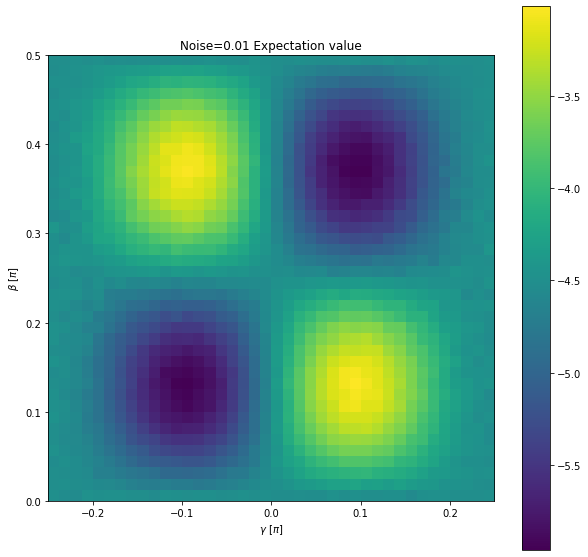

Energy at the noiseless optimum [-0.10*pi, 0.13*pi]: mean -5.96


In [8]:
print("=" * 100)
print(f"Minimum cost solution: {results['min_cost']:.2f}")
print(f"Gamma: {results['min_gamma'] /np.pi:.2f}*pi")
print(f"Beta: {results['min_betas']/np.pi:.2f}*pi")
print("=" * 100)
best_x = np.array((results["min_betas"],results["min_gamma"])) 
plt.figure(figsize=(10, 10))
plt.title(f"Noise={noise_level} Expectation value")
plt.imshow(results["total_cost_grid"][::-1],extent=extent)
plt.colorbar()
plt.xlabel(r"$\gamma \ [\pi]$")
plt.ylabel(r"$\beta \ [\pi]$")
plt.show()
min_indices = np.where(results_nf["total_cost_grid"] == np.min(results_nf["total_cost_grid"]))
gamma_nf = results_nf["min_gamma"]
beta_nf = results_nf["min_betas"]
print(f'Energy at the noiseless optimum [{gamma_nf/np.pi:.2f}*pi, {beta_nf/np.pi:.2f}*pi]: \
mean {results["total_cost_grid"][min_indices[0][0],min_indices[1][0]]:.2f}')

# Noisy landscape with large noise level

In [9]:
total_cost_grid = np.zeros((N_grid, N_grid))
min_cost = 1e10
min_gamma = 0.0
min_beta = 0.0
min_config = None
results = {}
##### set the noise level by error_para
noise_level = 0.05
# Since the measurement induce some variance by nature,
# repeat or enlarge the n_trail to mitigate the measurement noise 
func = get_black_box_objective_customized(G, p=p, error_para=[noise_level], n_trials=1024, repeat=10)
t = 0
start_time = time.time()
for k1 in range(len(betas)):
    for k2 in range(len(gammas)):
        beta = betas[k1]
        gamma = gammas[k2]
        if fix == True:
            ini_point = np.array((fix_x[0],fix_x[1],gamma,beta))
        else:
            ini_point = np.array((gamma,beta))
        total_cost = func(ini_point)
        total_cost_grid[k1, k2] = total_cost
        
        if total_cost < min_cost and beta != 0.0 and gamma != 0.0:
            min_cost = total_cost
            min_gamma = gamma
            min_beta = beta
        if t % 100 == 0:
            end_time = time.time()
            print(f'Finish {t}/{N_grid*N_grid}, elapse {end_time-start_time:.2f}')
        t += 1
results["min_cost"] = min_cost
results["min_gamma"] = min_gamma
results["min_betas"] = min_beta
results["beta_grid"] = betas
results["gamma_grid"] = gammas
results["total_cost_grid"] = total_cost_grid

Finish 0/1600, elapse 0.18
Finish 100/1600, elapse 16.34
Finish 200/1600, elapse 32.09
Finish 300/1600, elapse 48.16
Finish 400/1600, elapse 64.45
Finish 500/1600, elapse 81.26
Finish 600/1600, elapse 97.36
Finish 700/1600, elapse 113.51
Finish 800/1600, elapse 129.40
Finish 900/1600, elapse 145.47
Finish 1000/1600, elapse 161.44
Finish 1100/1600, elapse 177.28
Finish 1200/1600, elapse 193.33
Finish 1300/1600, elapse 209.87
Finish 1400/1600, elapse 225.91
Finish 1500/1600, elapse 241.89


Minimum cost solution: -5.24
Gamma: 0.10*pi
Beta: 0.37*pi


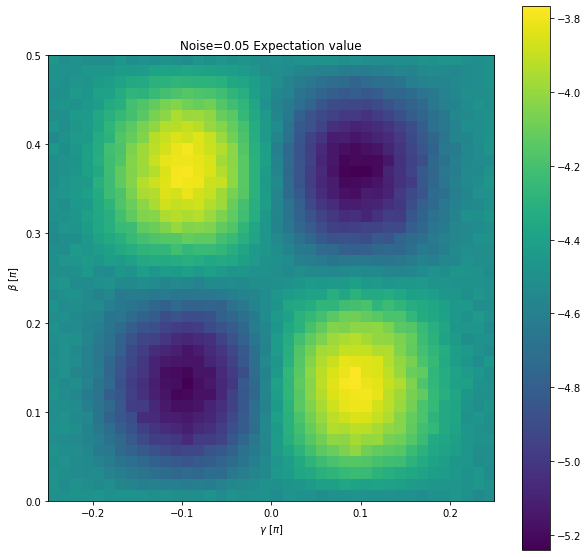

Energy at the noiseless optimum [-0.10*pi, 0.13*pi]: mean -5.24


In [10]:
print("=" * 100)
print(f"Minimum cost solution: {results['min_cost']:.2f}")
print(f"Gamma: {results['min_gamma'] /np.pi:.2f}*pi")
print(f"Beta: {results['min_betas']/np.pi:.2f}*pi")
print("=" * 100)
best_x = np.array((results["min_betas"],results["min_gamma"])) 
plt.figure(figsize=(10, 10))
plt.title(f"Noise={noise_level} Expectation value")
plt.imshow(results["total_cost_grid"][::-1],extent=extent)
plt.colorbar()
plt.xlabel(r"$\gamma \ [\pi]$")
plt.ylabel(r"$\beta \ [\pi]$")
plt.show()
min_indices = np.where(results_nf["total_cost_grid"] == np.min(results_nf["total_cost_grid"]))
gamma_nf = results_nf["min_gamma"]
beta_nf = results_nf["min_betas"]
print(f'Energy at the noiseless optimum [{gamma_nf/np.pi:.2f}*pi, {beta_nf/np.pi:.2f}*pi]: \
mean {results["total_cost_grid"][min_indices[0][0],min_indices[1][0]]:.2f}')